In [1]:
#Dependencies
import pymongo
import pandas as pd
import numpy as np
%pylab inline 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import pprint

Populating the interactive namespace from numpy and matplotlib


# Extract CSVs into DataFrames

In [2]:
#Read index file
index_file = "resources/index.csv"
index_df = pd.read_csv(index_file)
index_df.head()

,Unnamed: 0,path,class_id,train-valid
0,0,marvel/0001/001.jpg,1,train
1,1,marvel/0001/002.jpg,1,valid
2,2,marvel/0001/003.jpg,1,train
3,3,marvel/0001/004.jpg,1,train
4,4,marvel/0001/005.jpg,1,train


In [3]:
#Read metadata file
metadata_file = "resources/metadata.csv"
metadata_df = pd.read_csv(metadata_file)
metadata_df.head()

,Unnamed: 0,class_id,lego_ids,lego_names,minifigure_name
0,0,1,[76115],['Spider Mech vs. Venom'],SPIDER-MAN
1,1,2,[76115],['Spider Mech vs. Venom'],VENOM
2,2,3,[76115],['Spider Mech vs. Venom'],AUNT MAY
3,3,4,[76115],['Spider Mech vs. Venom'],GHOST SPIDER
4,4,5,[75208],"[""Yoda's Hut""]",YODA


# Clean data

In [4]:
# Clean data
metadata_df['lego_ids'] = metadata_df.apply(lambda x: x['lego_ids'].replace('[', '').replace(']', ''),axis=1)
metadata_df['lego_names'] = metadata_df.apply(lambda x: x['lego_names'].replace('[', '').replace(']', '').replace("'", "").replace('"', ""),axis=1)
metadata_df.head()

,Unnamed: 0,class_id,lego_ids,lego_names,minifigure_name
0,0,1,76115,Spider Mech vs. Venom,SPIDER-MAN
1,1,2,76115,Spider Mech vs. Venom,VENOM
2,2,3,76115,Spider Mech vs. Venom,AUNT MAY
3,3,4,76115,Spider Mech vs. Venom,GHOST SPIDER
4,4,5,75208,Yodas Hut,YODA


In [5]:
# Update paths for images
index_df['path'] = 'resources/' + index_df['path'].astype(str)
index_df.head()

,Unnamed: 0,path,class_id,train-valid
0,0,resources/marvel/0001/001.jpg,1,train
1,1,resources/marvel/0001/002.jpg,1,valid
2,2,resources/marvel/0001/003.jpg,1,train
3,3,resources/marvel/0001/004.jpg,1,train
4,4,resources/marvel/0001/005.jpg,1,train


# Transform dataFrames

In [6]:
index_cols = ["Unnamed: 0", "path", "class_id"]
index_transformed = index_df[index_cols].copy()
# Rename the column headers
index_transformed = index_transformed.rename(columns={"Unnamed: 0": "image_id",
                                                      "path": "image_path"})
# Set index
#index_transformed.set_index("image_id", inplace=True)
index_transformed.head()

,image_id,image_path,class_id
0,0,resources/marvel/0001/001.jpg,1
1,1,resources/marvel/0001/002.jpg,1
2,2,resources/marvel/0001/003.jpg,1
3,3,resources/marvel/0001/004.jpg,1
4,4,resources/marvel/0001/005.jpg,1


In [7]:
metadata_cols = ["class_id", "lego_ids", "lego_names", "minifigure_name"]
metadata_transformed = metadata_df[metadata_cols].copy()
# Rename the column headers
metadata_transformed = metadata_transformed.rename(columns={"lego_ids": "lego_id",
                                                            "lego_names": "lego_name"})
# Set index
#metadata_transformed.set_index("class_id", inplace=True)
metadata_transformed.head()

,class_id,lego_id,lego_name,minifigure_name
0,1,76115,Spider Mech vs. Venom,SPIDER-MAN
1,2,76115,Spider Mech vs. Venom,VENOM
2,3,76115,Spider Mech vs. Venom,AUNT MAY
3,4,76115,Spider Mech vs. Venom,GHOST SPIDER
4,5,75208,Yodas Hut,YODA


# Create database connection

In [8]:
# Setup connection to mongodb
conn = "mongodb://localhost:27017"
client = pymongo.MongoClient(conn)

# Select database and collection to use
db = client.legoDB
legoCT = db.legoCT
legoIMG = db.legoIMG

In [9]:
# Delete collections to avoid duplicate documents
legoCT.drop()
legoIMG.drop()

In [10]:
# Confirm the collection has been deleted
db.list_collection_names()

[]

# Load DataFrames into database

In [11]:
legoCT.insert_many(metadata_transformed.to_dict('records'))

In [12]:
legoIMG.insert_many(index_transformed.to_dict('records'))

In [13]:
for lego in legoCT.find({}):
    pprint.pprint(lego)

{'_id': ObjectId('5f5c59627fc1a183c9151030'),
 'class_id': 1,
 'lego_id': '76115',
 'lego_name': 'Spider Mech vs. Venom',
 'minifigure_name': 'SPIDER-MAN'}
{'_id': ObjectId('5f5c59627fc1a183c9151031'),
 'class_id': 2,
 'lego_id': '76115',
 'lego_name': 'Spider Mech vs. Venom',
 'minifigure_name': 'VENOM'}
{'_id': ObjectId('5f5c59627fc1a183c9151032'),
 'class_id': 3,
 'lego_id': '76115',
 'lego_name': 'Spider Mech vs. Venom',
 'minifigure_name': 'AUNT MAY'}
{'_id': ObjectId('5f5c59627fc1a183c9151033'),
 'class_id': 4,
 'lego_id': '76115',
 'lego_name': 'Spider Mech vs. Venom',
 'minifigure_name': 'GHOST SPIDER'}
{'_id': ObjectId('5f5c59627fc1a183c9151034'),
 'class_id': 5,
 'lego_id': '75208',
 'lego_name': 'Yodas Hut',
 'minifigure_name': 'YODA'}
{'_id': ObjectId('5f5c59627fc1a183c9151035'),
 'class_id': 6,
 'lego_id': '75208',
 'lego_name': 'Yodas Hut',
 'minifigure_name': 'LUKE SKYWALKER'}
{'_id': ObjectId('5f5c59627fc1a183c9151036'),
 'class_id': 7,
 'lego_id': '75208',
 'lego_name'

In [14]:
for image in legoIMG.find({}):
    pprint.pprint(image)

{'_id': ObjectId('5f5c59627fc1a183c9151043'),
 'class_id': 1,
 'image_id': 0,
 'image_path': 'resources/marvel/0001/001.jpg'}
{'_id': ObjectId('5f5c59627fc1a183c9151044'),
 'class_id': 1,
 'image_id': 1,
 'image_path': 'resources/marvel/0001/002.jpg'}
{'_id': ObjectId('5f5c59627fc1a183c9151045'),
 'class_id': 1,
 'image_id': 2,
 'image_path': 'resources/marvel/0001/003.jpg'}
{'_id': ObjectId('5f5c59627fc1a183c9151046'),
 'class_id': 1,
 'image_id': 3,
 'image_path': 'resources/marvel/0001/004.jpg'}
{'_id': ObjectId('5f5c59627fc1a183c9151047'),
 'class_id': 1,
 'image_id': 4,
 'image_path': 'resources/marvel/0001/005.jpg'}
{'_id': ObjectId('5f5c59627fc1a183c9151048'),
 'class_id': 1,
 'image_id': 5,
 'image_path': 'resources/marvel/0001/006.jpg'}
{'_id': ObjectId('5f5c59627fc1a183c9151049'),
 'class_id': 1,
 'image_id': 6,
 'image_path': 'resources/marvel/0001/007.jpg'}
{'_id': ObjectId('5f5c59627fc1a183c915104a'),
 'class_id': 1,
 'image_id': 7,
 'image_path': 'resources/marvel/0001/00

{'_id': ObjectId('5f5c59627fc1a183c91510c2'),
 'class_id': 13,
 'image_id': 127,
 'image_path': 'resources/star-wars/0009/001.jpg'}
{'_id': ObjectId('5f5c59627fc1a183c91510c3'),
 'class_id': 13,
 'image_id': 128,
 'image_path': 'resources/star-wars/0009/002.jpg'}
{'_id': ObjectId('5f5c59627fc1a183c91510c4'),
 'class_id': 13,
 'image_id': 129,
 'image_path': 'resources/star-wars/0009/003.jpg'}
{'_id': ObjectId('5f5c59627fc1a183c91510c5'),
 'class_id': 13,
 'image_id': 130,
 'image_path': 'resources/star-wars/0009/004.jpg'}
{'_id': ObjectId('5f5c59627fc1a183c91510c6'),
 'class_id': 13,
 'image_id': 131,
 'image_path': 'resources/star-wars/0009/005.jpg'}
{'_id': ObjectId('5f5c59627fc1a183c91510c7'),
 'class_id': 13,
 'image_id': 132,
 'image_path': 'resources/star-wars/0009/006.jpg'}
{'_id': ObjectId('5f5c59627fc1a183c91510c8'),
 'class_id': 13,
 'image_id': 133,
 'image_path': 'resources/star-wars/0009/007.jpg'}
{'_id': ObjectId('5f5c59627fc1a183c91510c9'),
 'class_id': 14,
 'image_id': 

In [15]:
for i in legoCT.find({'minifigure_name': 'YODA'}):
    pprint.pprint(i)

{'_id': ObjectId('5f5c59627fc1a183c9151034'),
 'class_id': 5,
 'lego_id': '75208',
 'lego_name': 'Yodas Hut',
 'minifigure_name': 'YODA'}


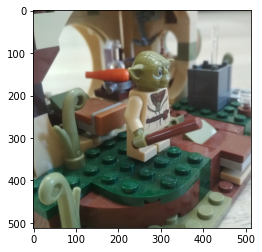

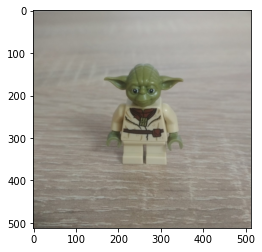

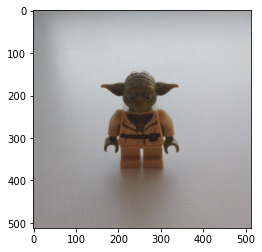

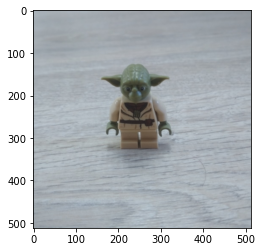

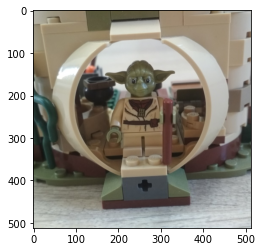

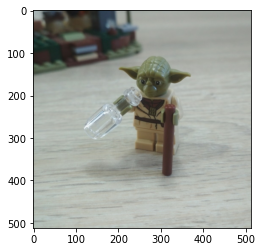

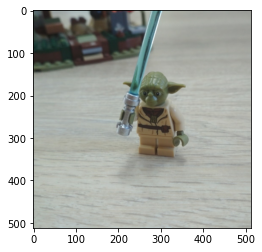

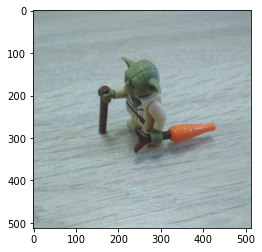

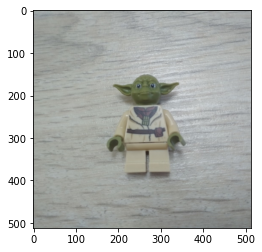

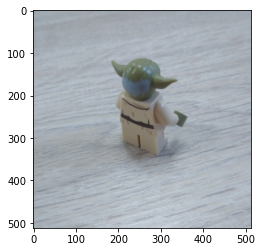

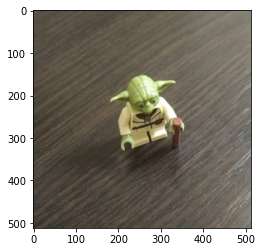

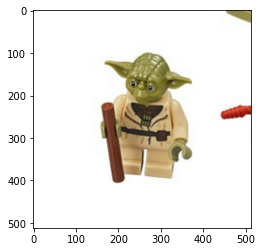

In [16]:
for image in legoIMG.find({'class_id': 5}):
    img=mpimg.imread(image["image_path"]) 
    imgplot = plt.imshow(img) 
    plt.show() 